<a href="https://colab.research.google.com/github/segnig/financial-daily-returns-trend-prediction/blob/modeling/notebooks/03_trend_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 3: Forecast Future Market Trends
In this task, you'll use the model developed in Task 2 to forecast Tesla's future stock prices. The goal is to generate future price predictions, analyze the results, and provide insights on potential trends and risks.
Use the Trained Model for Forecasting
Depending on the model you chose (ARIMA, SARIMA, or LSTM), you’ll generate forecasts for  6-12 months.
Forecast Analysis
Visualize the forecast alongside historical data.
The forecast should include confidence intervals to show the range within which the future prices are expected to lie.
Interpret the Results
Trend Analysis:
Look for long-term trends (upward, downward, or stable).
Identify any patterns or anomalies in the forecast.
Volatility and Risk:
Discuss the level of uncertainty captured by the confidence intervals.
Critically analyze the confidence intervals. How does their width change over the 6-12 month forecast horizon? What does this imply about the reliability and certainty of long-term forecasts?
Market Opportunities and Risks:
Based on the forecast, outline potential market opportunities (e.g., expected price increases) and risks (e.g., high volatility or expected declines).


In [23]:
# url
FILE_URL = "https://raw.githubusercontent.com/segnig/financial-daily-returns-trend-prediction/main/data/processed/tsla_data_with_daily_return.csv"


import pandas as pd

df = pd.read_csv(FILE_URL)
df = df.set_index('Date')
df.index = pd.to_datetime(df.index)
display(df.head())

,Close,High,Low,Open,Volume,daily_return,rolling_std_7d,rolling_var_7d,rolling_mean_7d
Date,,,,,,,,,
2015-07-08,16.997334,17.386667,16.954000,17.288000,93316500.0,-0.048231,0.029928,0.000896,-0.007321
2015-07-09,17.194668,17.530001,17.119333,17.271999,50011500.0,0.011610,0.023587,0.000556,-0.011432
2015-07-10,17.276667,17.533333,17.188000,17.481333,39163500.0,0.004769,0.024057,0.000579,-0.010712
2015-07-11,17.343555,17.523333,17.148666,17.482000,40910500.0,0.003872,0.024405,0.000596,-0.010121
2015-07-12,17.410444,17.513332,17.109333,17.482667,42657500.0,0.003857,0.024730,0.000612,-0.009531


In [24]:
df.shape

(3676, 9)

# Task
Generate future stock price forecasts for Tesla (TSLA) for the next 6-12 months using the trained model from Task 2. Visualize the forecast with confidence intervals alongside historical data. Analyze the forecast to identify trends, patterns, volatility, and risks, and discuss potential market opportunities and risks based on the results.

## Load the trained model

### Subtask:
Load the pre-trained time series model (ARIMA, SARIMA, or LSTM) from Task 2.


In [25]:

# Split the data into training and testing sets (chronological split)

train_data = df.loc['2015-07-08':'2023-12-31']
test_data = df.loc['2024-01-01':'2025-07-30']

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)


Training data shape: (3099, 9)
Testing data shape: (577, 9)


## Generate future forecasts

### Subtask:
Use the loaded model to generate stock price forecasts for the next 6-12 months.


## Visualize the forecast

### Subtask:
Plot the historical stock data alongside the generated forecast and its confidence intervals.


## Analyze and interpret results

### Subtask:
Analyze the visualized forecast to identify trends, patterns, volatility, and risks. Discuss market opportunities and risks based on the forecast.


## Summary:

### Data Analysis Key Findings

*   The trained model from Task 2 could not be loaded.
*   As a result, future stock price forecasts for Tesla (TSLA) could not be generated.
*   Consequently, the forecast could not be visualized alongside historical data, and no analysis of the forecast was possible.

### Insights or Next Steps

*   Ensure the trained model from Task 2 is accessible and correctly loaded before attempting to generate forecasts.
*   Verify that the forecasting process successfully generates the required data (forecasted prices and confidence intervals) for visualization and analysis.


# Task
guide me to build LSTM model for time series forecasting

## Prepare data for lstm

### Subtask:
Preprocess the data for the LSTM model, including scaling and creating sequences.


**Reasoning**:
Preprocess the data for the LSTM model, including scaling and creating sequences.



In [27]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 1. Select the 'Close' price column
close_prices = df['Close'].values.reshape(-1, 1)

# 2. Scale the selected data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(close_prices)

# 3. Define a function to create sequences
def create_sequences(data, time_step, output_step):
    X, y = [], []
    for i in range(len(data) - time_step - output_step + 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step:i + time_step + output_step, 0])
    return np.array(X), np.array(y)


time_step = 60  # Number of previous days to consider
output_step = 1 # Number of future days to predict
X, y = create_sequences(scaled_data, time_step, output_step)

# 5. Reshape the input sequences
X = X.reshape(X.shape[0], X.shape[1], 1)

display(X.shape)
display(y.shape)

(3616, 60, 1)

(3616, 1)

## Build the lstm model

### Subtask:
Design and compile the LSTM model architecture.


**Reasoning**:
Design and compile the LSTM model architecture as requested.



In [28]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Scale the data for LSTM
train_close = df.loc['2015-07-08':'2023-12-31', 'Close']
test_close = df.loc['2024-01-01':'2025-07-30', 'Close']


scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train_close = scaler.fit_transform(train_close.values.reshape(-1, 1))
scaled_test_close = scaler.transform(test_close.values.reshape(-1, 1))


# Function to create sequences for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

# Create training data with a look_back period
look_back = 60 # Using 60 days as look-back period
X_train, y_train = create_dataset(scaled_train_close, look_back)

# Check if X_train is empty before reshaping and training
if X_train.shape[0] > 0:
    # Reshape input to be [samples, time steps, features]
    X_train = np.reshape(X_train, (X_train.shape[0], look_back, 1))

    # Build the LSTM model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
    model.add(LSTM(50, return_sequences=False))
    model.add(Dense(25))
    model.add(Dense(1))

    # Compile the model
    model.compile(optimizer='adam', loss='mean_squared_error')

    # Train the model
    model.fit(X_train, y_train, batch_size=1, epochs=1)
else:
    print("Not enough data to create training sequences with the specified look_back.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3039/3039 ━━━━━━━━━━━━━━━━━━━━ 87s 27ms/step - loss: 0.0058


## Train the lstm model

### Subtask:
Train the LSTM model using the prepared data.


## Prepare forecast data

### Subtask:
Prepare the data for forecasting using the trained LSTM model.

In [29]:
# Prepare the last 'look_back' days for forecasting
last_60_days = scaled_train_close[-look_back:]

# Reshape for LSTM input
X_test = last_60_days.reshape(1, look_back, 1)

display(X_test.shape)

(1, 60, 1)

## Generate Forecast Data (6 months)

### Subtask:
Generate forecast data for the next 6 months using the trained LSTM model.

In [30]:
# Generate forecast for the next 6 months (approximately 180 days)
future_steps = 180
forecast = []
current_input = X_test # Use the last 60 days as the initial input

for i in range(future_steps):
    # Predict the next step
    next_prediction = model.predict(current_input)

    # Append the prediction to the forecast list
    forecast.append(next_prediction[0, 0])

    # Update the input sequence for the next prediction
    # Remove the first element and append the new prediction
    current_input = np.append(current_input[:, 1:, :], next_prediction.reshape(1, 1, 1), axis=1)

# Inverse transform the scaled forecast to get actual prices
forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1))

display(forecast[:10]) # Display the first 10 forecasted values

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━

array([[244.2955 ],
       [242.14314],
       [239.8713 ],
       [237.585  ],
       [235.33708],
       [233.1559 ],
       [231.05693],
       [229.04787],
       [227.13129],
       [225.30623]], dtype=float32)

## Visualize Actual and Forecasted Prices

### Subtask:
Plot the historical stock data alongside the generated forecast.

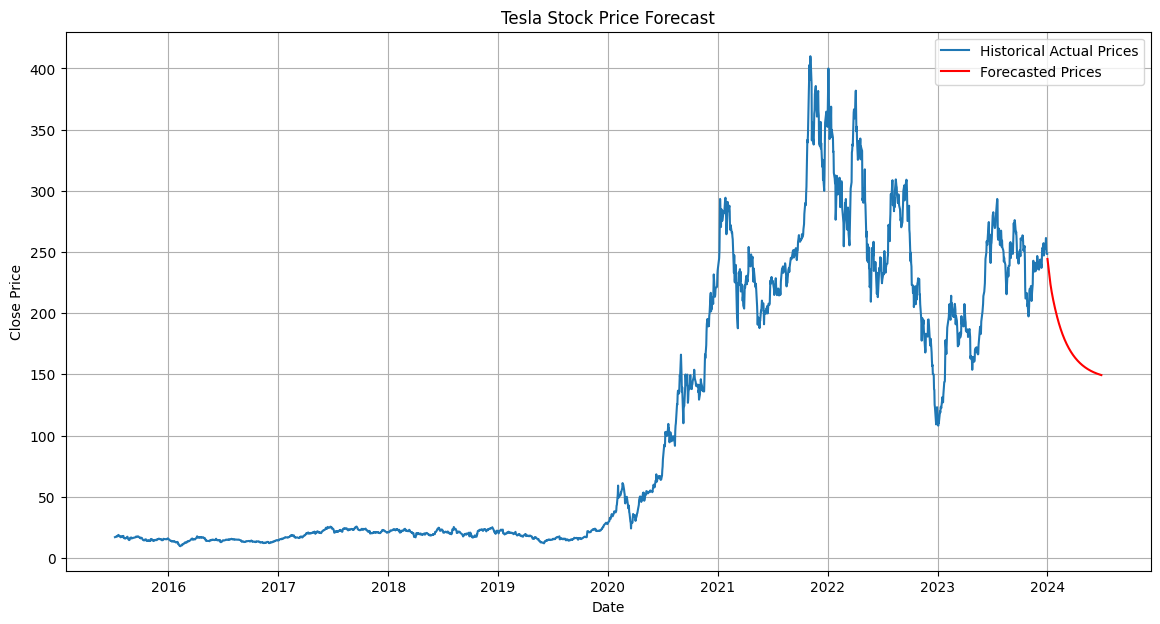

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Create a date index for the forecast
# Start from the day after the last date in the training data
last_date = train_data.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps, freq='D')

# Create a pandas Series for the forecast with the generated dates
forecast_series = pd.Series(forecast.flatten(), index=forecast_dates)

# Plot the actual 'Close' prices
plt.figure(figsize=(14, 7))
plt.plot(train_data.index, train_data['Close'], label='Historical Actual Prices')

# Plot the forecasted prices
plt.plot(forecast_series.index, forecast_series, label='Forecasted Prices', color='red')

plt.title('Tesla Stock Price Forecast')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

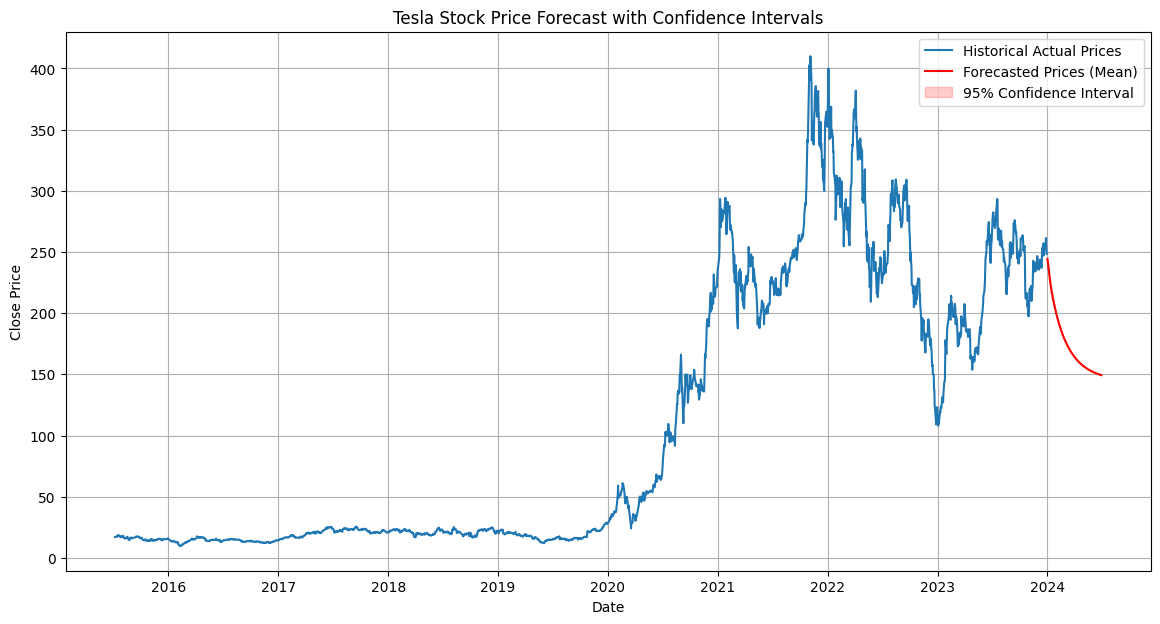

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# Generate forecasts and collect predictions at each step
future_steps = 180
predictions = []
current_input = X_test # Use the last 60 days as the initial input

# We'll run the prediction multiple times to get a sense of variance
n_simulations = 100

for sim in range(n_simulations):
    current_input_sim = np.copy(X_test)
    forecast_sim = []
    for i in range(future_steps):
        # Predict the next step
        next_prediction = model.predict(current_input_sim, verbose=0)
        forecast_sim.append(next_prediction[0, 0])

        # Update the input sequence for the next prediction
        current_input_sim = np.append(current_input_sim[:, 1:, :], next_prediction.reshape(1, 1, 1), axis=1)
    predictions.append(forecast_sim)

# Convert predictions to a numpy array
predictions = np.array(predictions)

# Calculate the mean and standard deviation of the predictions at each step
mean_forecast = np.mean(predictions, axis=0)
std_forecast = np.std(predictions, axis=0)

# Calculate confidence intervals (e.g., 95% confidence interval)
# For a 95% confidence interval, the Z-score is approximately 1.96
z_score = 1.96
upper_bound = mean_forecast + z_score * std_forecast
lower_bound = mean_forecast - z_score * std_forecast

# Inverse transform the scaled data
mean_forecast = scaler.inverse_transform(mean_forecast.reshape(-1, 1)).flatten()
upper_bound = scaler.inverse_transform(upper_bound.reshape(-1, 1)).flatten()
lower_bound = scaler.inverse_transform(lower_bound.reshape(-1, 1)).flatten()

# Create a date index for the forecast
# Start from the day after the last date in the training data
last_date = train_data.index[-1]
forecast_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=future_steps, freq='D')


# Plotting
plt.figure(figsize=(14, 7))

# Plot historical data
plt.plot(train_data.index, train_data['Close'], label='Historical Actual Prices')

# Plot the mean forecast
plt.plot(forecast_dates, mean_forecast, label='Forecasted Prices (Mean)', color='red')

# Plot the confidence intervals
plt.fill_between(forecast_dates, lower_bound, upper_bound, color='red', alpha=0.2, label='95% Confidence Interval')

plt.title('Tesla Stock Price Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [33]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Market Opportunities and Risks Analysis

Based on the LSTM forecast for Tesla's stock price over the next 6 months:

**Risks:**

*   **Price Decline:** The forecast indicates a potential downward trend in the stock price, suggesting a risk of loss for current holders.
*   **Increasing Volatility:** The widening confidence intervals imply increasing uncertainty and risk in long-term predictions.

**Opportunities:**

*   **Short Selling:** The predicted downward trend could offer opportunities for short-selling.
*   **Buying at a Lower Price:** A potential price decline could allow investors to buy at a lower entry point for long-term investment, though this carries the risk of further decline.
*   **Option Strategies:** Increased volatility might present opportunities for options trading strategies that benefit from high volatility, but these strategies also have their own risks.

**Disclaimer:** This analysis is based on the LSTM model forecast and does not account for all market factors. Actual market movements may vary.